In [94]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [95]:
# libraries to import the .mat files
import scipy.io as sio
import h5py

In [96]:
# importing os to get the current directory
import os

# Loading the data 

- We use the naming format of the data files to extract the information from them and store them in the dataframe ```data``` variable.
- The ```data``` variable stores a dictionary where each key corresponds to a file (We might consolidate all the entries into one dataframe later on). Each entry in the dictionary stores a list of datapoints. 
- Each datapoint is a dictionary with the following keys: 
    - <i>PID</i>: Patient ID
    - <i>image</i>: Image data
    - <i>label</i>: Label of the image
    - <i>tumorBorder</i>: Tumor border data
    - <i>tumorMask</i>: Tumor mask data

In [97]:
# Define the directory where the data is located
data_dir = 'data'

# Get a list of all subdirectories in the data directory that start with 'brainTumorDataPublic_'
data_dirs = [f for f in os.listdir(data_dir) if f.startswith('brainTumorDataPublic_') and os.path.isdir(os.path.join(data_dir, f))]

# Initialize an empty list to store the data
data = {}
counter = 0
dir_counter = 0

# Loop over each subdirectory
for d in data_dirs:

    data[dir_counter] = []

    # Get a list of all .mat files in the subdirectory
    files = [f for f in os.listdir(os.path.join(data_dir, d)) if f.endswith('.mat')]
    
    # Load each .mat file and append it to the data list
    for f in files:
        with h5py.File(os.path.join(data_dir, d, f), 'r') as file:
            # Access the 'cjdata' group
            cjdata = file['cjdata']

            # Initialize an empty dictionary to store the data from this file
            file_data = {}
            
            # Convert the data to a numpy array and append it to the data list
            for name in cjdata:
                # Add the member to the dictionary
                file_data[name] = np.array(cjdata[name])
                if name == 'label':
                    file_data[name] = file_data[name][0][0]
            # Append the dictionary to the data list
            data[dir_counter].append(file_data)

            # Increment the counter
            counter += 1
            # print the PID and label
            # print(f'Counter: {counter}')
    dir_counter += 1
            

# Exploratory data analysis

In [98]:
# print the number of keys in data
print(f'Number of keys in data: {len(data)}')

# Print the labels of the first sample
print(f'Labels: {data[0][0].keys()}')

# Print the number of samples
print(f'Number of samples: {len(data)}')

Number of keys in data: 4
Labels: dict_keys(['PID', 'image', 'label', 'tumorBorder', 'tumorMask'])
Number of samples: 4


In [99]:
# for the first 3 samples, print the keys and the shape of the data
for i in range(3):
    print(f'Sample {i}:')
    for key in data[1][i]:
        print(f'  {key}: {data[0][i][key].shape}')

Sample 0:
  PID: (6, 1)
  image: (512, 512)
  label: ()
  tumorBorder: (1, 24)
  tumorMask: (512, 512)
Sample 1:
  PID: (6, 1)
  image: (512, 512)
  label: ()
  tumorBorder: (1, 26)
  tumorMask: (512, 512)
Sample 2:
  PID: (6, 1)
  image: (512, 512)
  label: ()
  tumorBorder: (1, 30)
  tumorMask: (512, 512)


In [100]:
# Function to display all the attributes of a datapoint

def display_data(datum):
    print(f'Label = {datum["label"]}')
    print(f"Image shape: {datum['image'].shape}, dtype: {datum['image'].dtype}")
    print(f"Tumor Mask shape: {datum['tumorMask'].shape}, dtype: {datum['tumorMask'].dtype}")
    print(f"Tumor Border shape: {datum['tumorBorder'].shape}, dtype: {datum['tumorBorder'].dtype}")
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    ax[0].imshow(datum['image'], cmap='gray')
    ax[0].set_title('Image')
    ax[1].imshow(datum['tumorMask'], cmap='gray')
    ax[1].set_title('Tumor Mask')
    ax[2].imshow(datum['image'], cmap='gray')
    tumor_border_coords = datum['tumorBorder'].reshape(-1, 2)  # Assuming it's a list of (x, y) coordinates
    #draw tumor border onto image using coordinates from tumor border
    for i in range(tumor_border_coords.shape[0] - 1):
        y1, x1 = tumor_border_coords[i]
        y2, x2 = tumor_border_coords[i + 1]
        ax[2].plot([x1, x2], [y1, y2], 'r')  # Drawing red lines between consecutive points
    ax[2].set_title('Tumor Border')
    just_tumor = np.zeros_like(datum['tumorMask'])
    just_tumor = datum['image'] * datum['tumorMask']
    # just_tumor[datum['tumorMask'] == 1] = datum['image'][datum['tumorMask'] == 1]
    ax[3].imshow(just_tumor, cmap='gray')
    ax[3].set_title('Just Tumor')
    plt.show()

### Printing a few datapoints for each tumor type

Here, we use the label attribute to get the tumor type of each image. We then print a few images for each tumor type to get a sense of the data. <br>
We have also created a function that visualizes the images in the data. 

Label = 3.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 24), dtype: float64


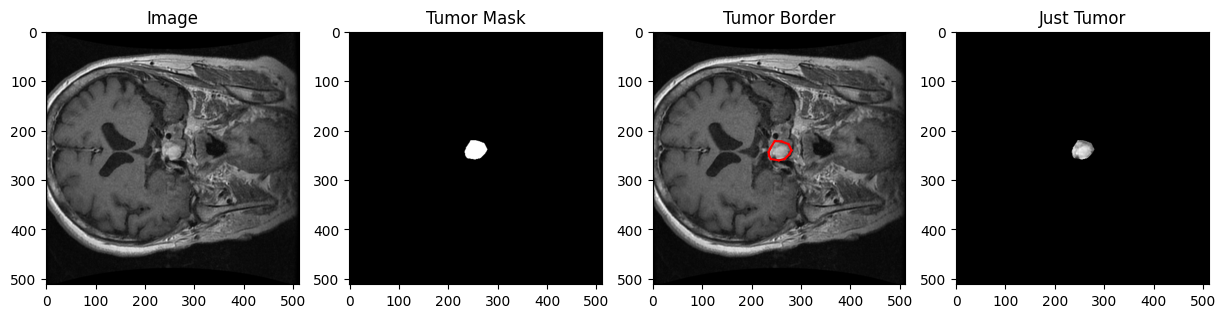

Label = 3.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 26), dtype: float64


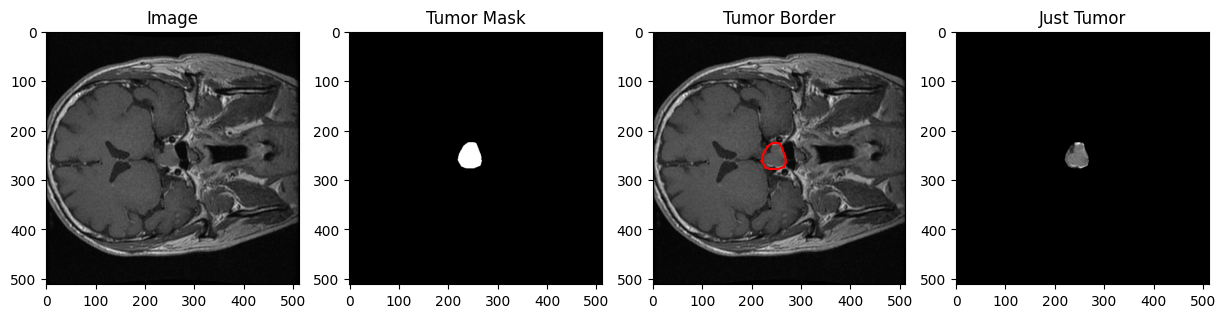

Label = 3.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 30), dtype: float64


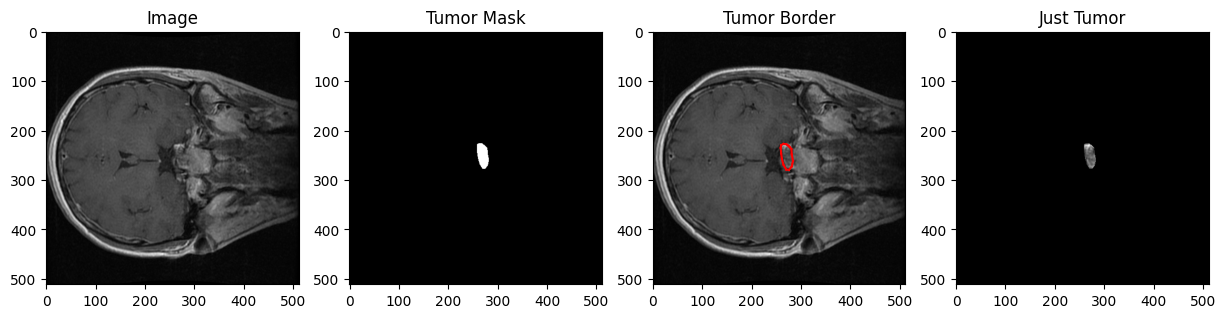

Label = 3.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 38), dtype: float64


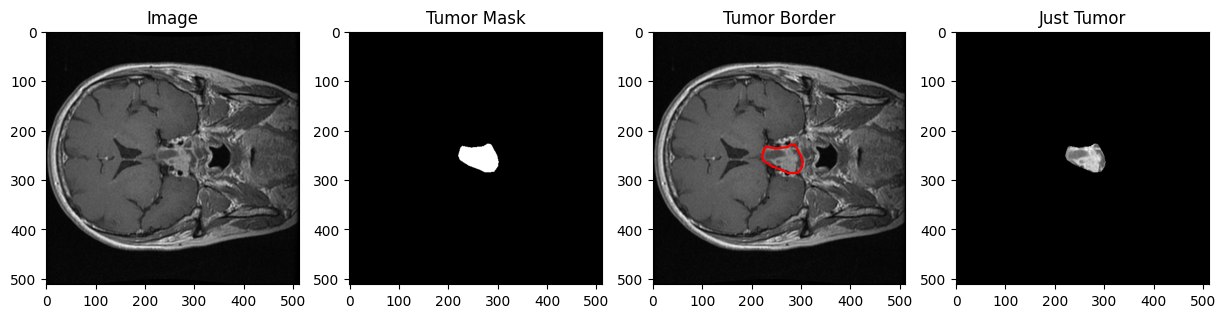

Label = 3.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 42), dtype: float64


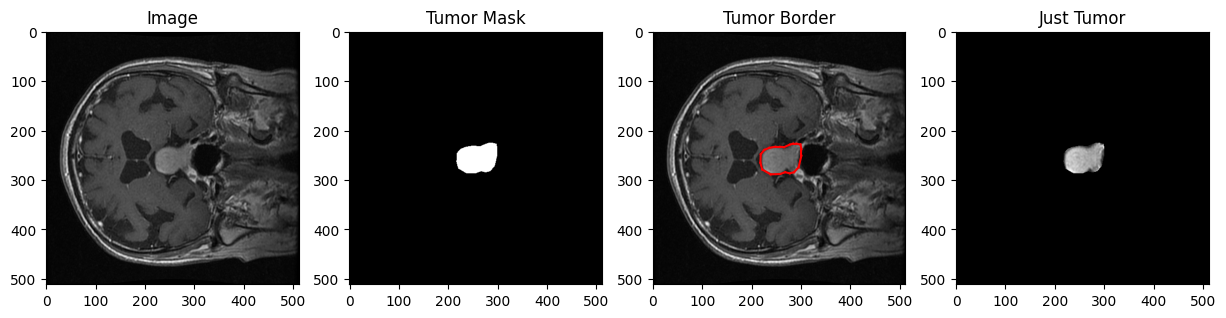

Label = 2.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 38), dtype: float64


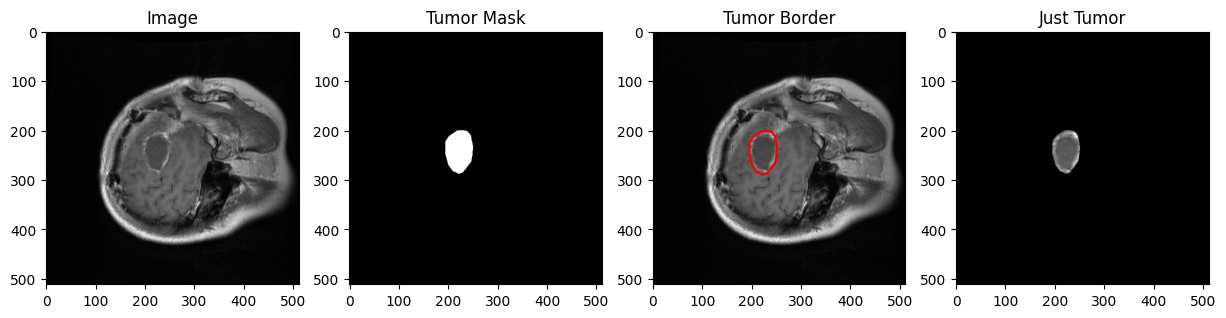

Label = 2.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 48), dtype: float64


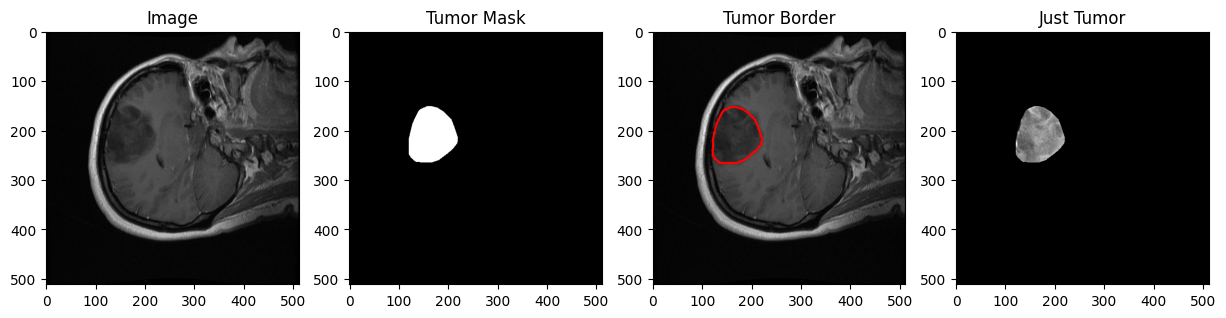

Label = 2.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 50), dtype: float64


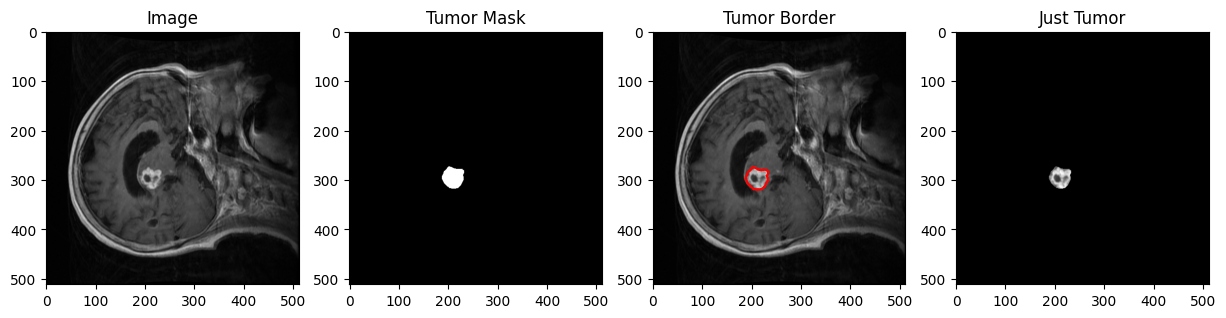

Label = 2.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 30), dtype: float64


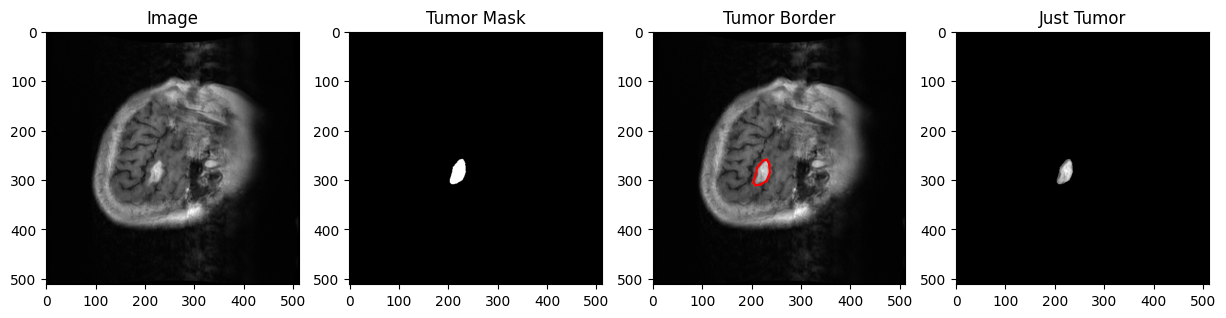

Label = 2.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 40), dtype: float64


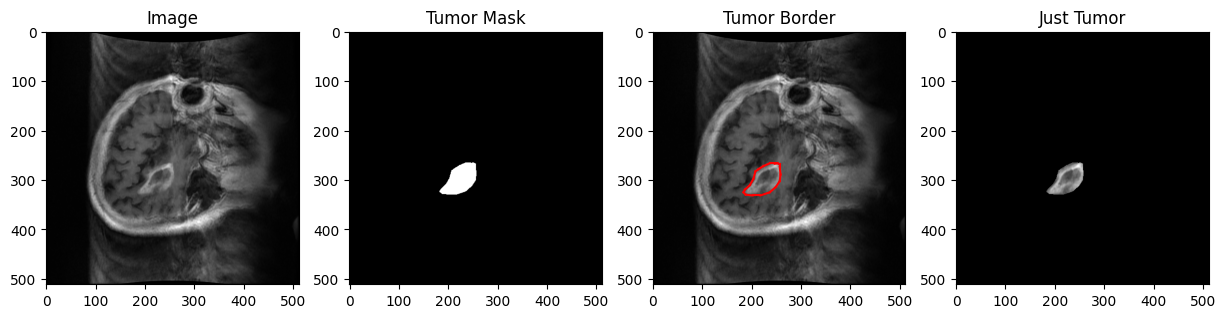

Label = 1.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 40), dtype: float64


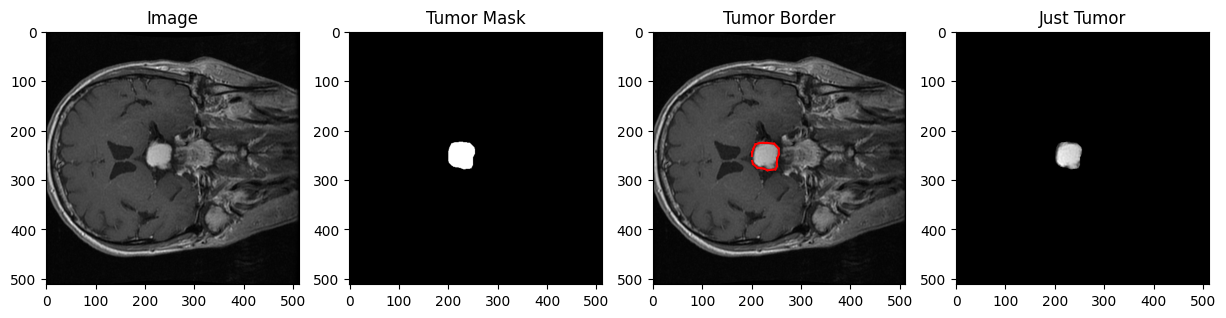

Label = 1.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 50), dtype: float64


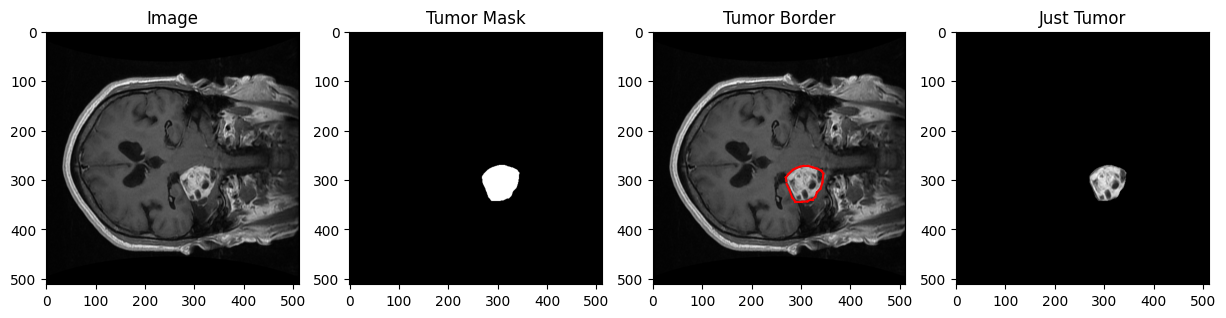

Label = 1.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 46), dtype: float64


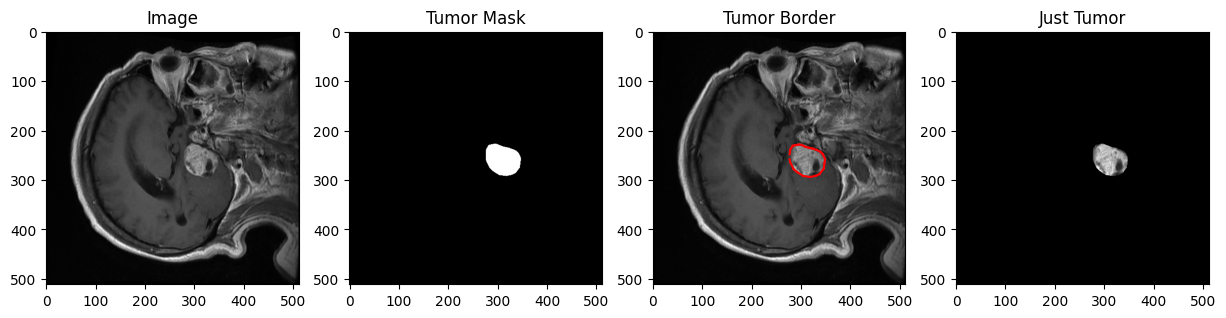

Label = 1.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 42), dtype: float64


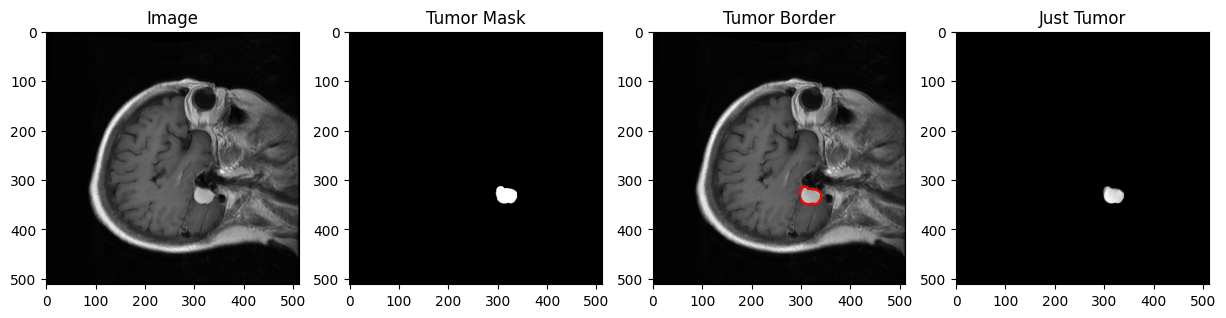

Label = 1.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 40), dtype: float64


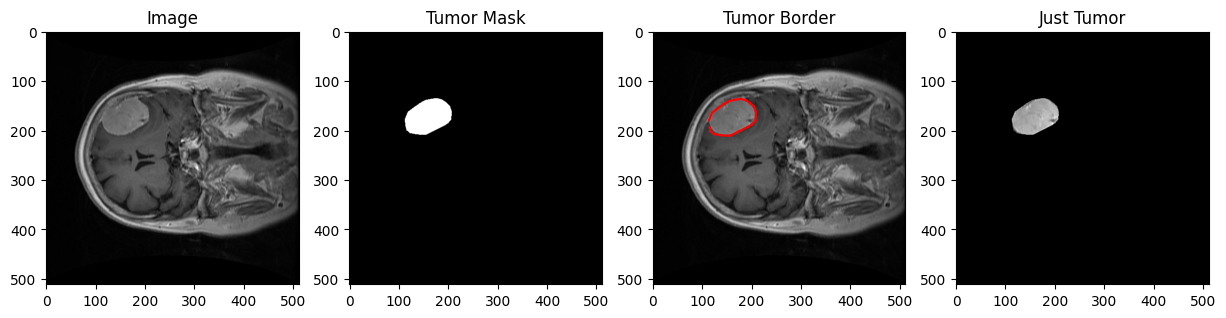

In [101]:
# Initialize a dictionary to keep track of how many elements of each label type have been printed
count = {0: 0, 1: 0, 2: 0, 3: 0}

# Loop over each key in the data dictionary
for j in range(4):
    # Loop over each dictionary in the list
    for i in range(len(data[j])):
        # Check if the label of the current dictionary is one of the keys in the count dictionary
        if data[j][i]['label'] in count:
            # Check if less than 5 elements of this label type have been printed
            if count[data[j][i]['label']] < 5:
                # Print the data
                display_data(data[j][i])
                
                # Increment the count for this label type
                count[data[j][i]['label']] += 1

In [102]:
# Consolidate the data into a single list
data_list = []
for j in range(4):
    print(f'Number of samples in data[{j}]: {len(data[j])}')
    data_list += data[j]

print(f'Number of samples: {len(data_list)}')


Number of samples in data[0]: 766
Number of samples in data[1]: 766
Number of samples in data[2]: 766
Number of samples in data[3]: 766
Number of samples: 3064


In [103]:
# print the max values of each image, tumorMask, and tumorBorder
max_image = 0
max_tumorMask = 0
max_tumorBorder = 0
for i in range(len(data_list)):
    max_image = max(max_image, data_list[i]['image'].max())
    max_tumorMask = max(max_tumorMask, data_list[i]['tumorMask'].max())
    max_tumorBorder = max(max_tumorBorder, data_list[i]['tumorBorder'].max())

print(f'Max image value: {max_image}')
print(f'Max tumor mask value: {max_tumorMask}')
print(f'Max tumor border value: {max_tumorBorder}')

Max image value: 12728
Max tumor mask value: 1
Max tumor border value: 470.0766550522648


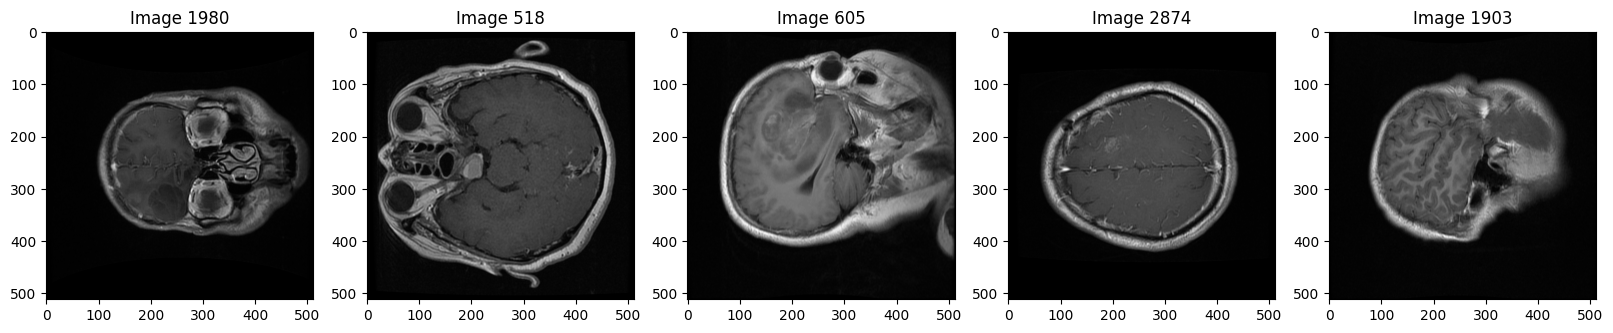

In [104]:
# Normalize the images and bounding box coordinates
for i in range(len(data_list)):
    data_list[i]['image'] = data_list[i]['image'] / max_image  # Normalize the image
    data_list[i]['tumorBorder'] = data_list[i]['tumorBorder'] / 512  # Assuming the image size is 512x512, which we have confirmed it to be

# Display the 5 random images
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    idx = np.random.randint(len(data_list))
    ax[i].imshow(data_list[idx]['image'], cmap='gray')
    ax[i].set_title(f'Image {idx}')
plt.show()



In [105]:
# print the max values of each image, tumorMask, and tumorBorder to confirm that they have been normalized
max_image = 0
max_tumorMask = 0
max_tumorBorder = 0
for i in range(len(data_list)):
    max_image = max(max_image, data_list[i]['image'].max())
    max_tumorMask = max(max_tumorMask, data_list[i]['tumorMask'].max())
    max_tumorBorder = max(max_tumorBorder, data_list[i]['tumorBorder'].max())

print(f'Max image value: {max_image}')
print(f'Max tumor mask value: {max_tumorMask}')
print(f'Max tumor border value: {max_tumorBorder}')

Max image value: 1.0
Max tumor mask value: 1
Max tumor border value: 0.9181184668989547


In [106]:
# print the raw array of an image, tumorMask, and tumorBorder

print(f'Image: {data_list[0]["image"]}')
print(f'Tumor Mask: {data_list[0]["tumorMask"]}')
print(f'Tumor Border: {data_list[0]["tumorBorder"]}')


Image: [[0.         0.         0.00031427 ... 0.         0.         0.        ]
 [0.         0.         0.00031427 ... 0.         0.         0.        ]
 [0.         0.         0.0007071  ... 0.         0.         0.        ]
 ...
 [0.         0.00031427 0.00125707 ... 0.         0.         0.        ]
 [0.         0.0002357  0.0009428  ... 0.         0.         0.        ]
 [0.         0.0002357  0.00102137 ... 0.         0.         0.        ]]
Tumor Mask: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Tumor Border: [[0.46515679 0.46167247 0.43205575 0.4825784  0.43379791 0.5087108
  0.44425087 0.53658537 0.46864111 0.54878049 0.48432056 0.54006969
  0.50348432 0.52090592 0.5087108  0.49825784 0.50348432 0.46689895
  0.4912892  0.45993031 0.47560976 0.45818815 0.46167247 0.46515679]]


In [107]:
# Split the data into training, validation, and test sets

# Set the random seed
np.random.seed(0)

# Shuffle the data
np.random.shuffle(data_list)

# Split the data into training, validation, and test sets
n = len(data_list)
train_data = data_list[:int(0.7*n)]
val_data = data_list[int(0.7*n):int(0.85*n)]
test_data = data_list[int(0.85*n):]

print(f'Number of training samples: {len(train_data)}')
print(f'Number of validation samples: {len(val_data)}')
print(f'Number of test samples: {len(test_data)}')



Number of training samples: 2144
Number of validation samples: 460
Number of test samples: 460


### Adding Data Augmentation

In [108]:
import cv2

In [115]:
def augment_data(image, bbox):
    # Original image and bounding box
    original_image = image
    original_bbox = bbox.reshape(-1, 2)

    # Horizontally flipped image and bounding box
    flipped_image = cv2.flip(original_image, 1)  # 1 means flipping around y-axis
    flipped_bbox = original_bbox.copy()
    flipped_bbox[:, 0] = 1 - flipped_bbox[:, 0]

    # Mirrored image and bounding box
    mirrored_image = original_image[:, ::-1]
    mirrored_bbox = original_bbox.copy()
    mirrored_bbox[:, 0] = 1 - mirrored_bbox[:, 0]

    return [(original_image, original_bbox.flatten()[np.newaxis, :]), 
            (flipped_image, flipped_bbox.flatten()[np.newaxis, :]), 
            (mirrored_image, mirrored_bbox.flatten()[np.newaxis, :])]

In [116]:
def display_simple_data(datum):
    print(f'Label = {datum["label"]}')
    print(f"Image shape: {datum['image'].shape}, dtype: {datum['image'].dtype}")
    print(f"Tumor Border shape: {datum['tumorBorder'].shape}, dtype: {datum['tumorBorder'].dtype}")
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    ax[0].imshow(datum['image'], cmap='gray')
    ax[0].set_title('Image')
    
    tumor_border_coords = datum['tumorBorder'].reshape(-1, 2)  # Assuming it's a list of (x, y) coordinates
    ax[1].imshow(datum['image'], cmap='gray')
    #draw tumor border onto image using coordinates from tumor border
    for i in range(tumor_border_coords.shape[0] - 1):
        y1, x1 = tumor_border_coords[i]
        y2, x2 = tumor_border_coords[i + 1]
        ax[1].plot([x1, x2], [y1, y2], 'r')  # Drawing red lines between consecutive points
    ax[1].set_title('Tumor Border')
    
    just_tumor = np.zeros_like(datum['image'])
    just_tumor = datum['image'] * datum['tumorBorder']
    ax[2].imshow(just_tumor, cmap='gray')
    ax[2].set_title('Just Tumor')
    
    plt.show()

Label = 2.0
Image shape: (512, 512), dtype: float64
Tumor Border shape: (1, 34), dtype: float64


ValueError: operands could not be broadcast together with shapes (512,512) (1,34) 

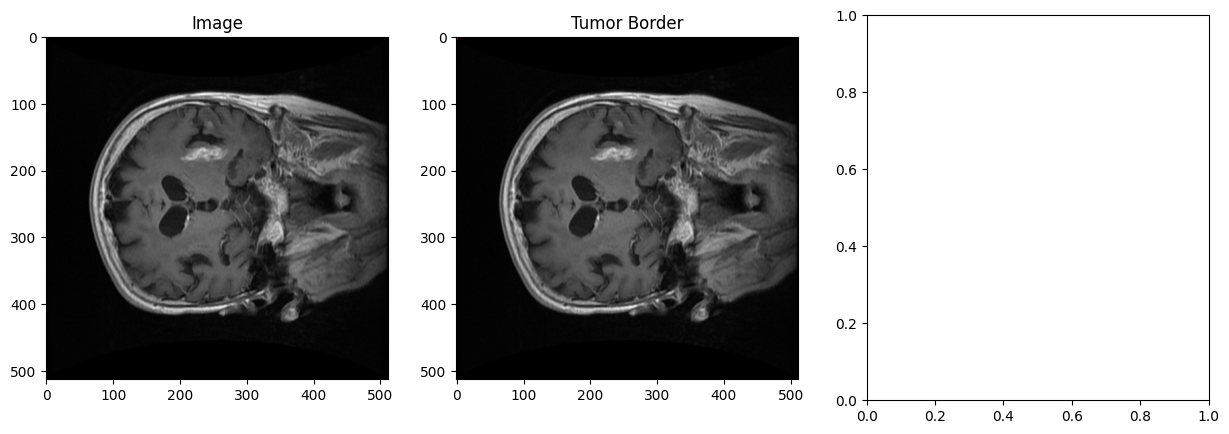

In [118]:
# display first 3 samples using display_simple_data witout augmentation
for i in range(3):
    display_simple_data(train_data[i])

Label = 3.0
Image shape: (512, 512), dtype: float64
Tumor Border shape: (1, 36), dtype: float64


ValueError: operands could not be broadcast together with shapes (512,512) (1,36) 

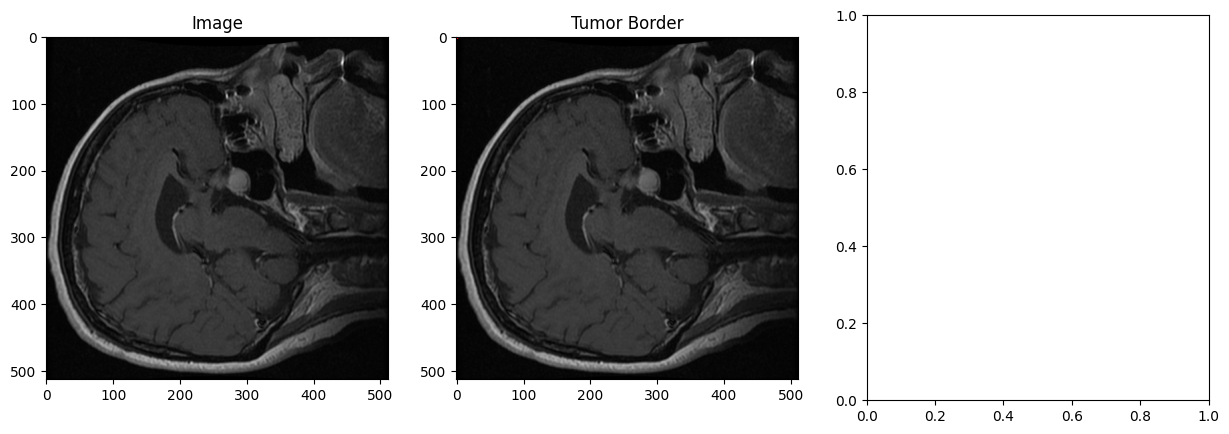

In [117]:
# Print some of the training datapoints, with augmentation. Augment the images and bounding boxes, make them a part of a datum and call the 
# display_data function to display the images and bounding boxes

for i in range(5):
    idx = np.random.randint(len(train_data))
    datum = train_data[idx]
    image = datum['image']
    bbox = datum['tumorBorder']
    augmented_data = augment_data(image, bbox)
    for j, (augmented_image, augmented_bbox) in enumerate(augmented_data):
        augmented_datum = {'image': augmented_image, 'tumorBorder': augmented_bbox, 'label': datum['label']}
        display_simple_data(augmented_datum)
        if j == 0:
            print('Original')
        elif j == 1:
            print('Flipped')
        elif j == 2:
            print('Mirrored')
        print()

### Data format

The data is stored in a list where each entry is a dictionary with the following keys:
- <i>PID</i>: Patient ID
- <i>image</i>: Image data
- <i>label</i>: Label of the image
- <i>tumorBorder</i>: Tumor border data
- <i>tumorMask</i>: Tumor mask data



In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D

In [ ]:
# Define the input layer
inputs = Input(shape=(512, 512, 1))

# Add convolutional and pooling layers
x = Conv2D(32, (3, 3), activation='relu', strides=2)(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', strides=2)(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', strides=2)(x)

# Flatten the output
x = Flatten()(x)

# Add a dense layer
x = Dense(128, activation='relu')(x)

# Define the classification output
classification_output = Dense(3, activation='softmax', name='classification')(x)

# Define the bounding box regression output
bbox_output = Dense(4, name='bbox_regression')(x)  # Changed from 20 to 4

# Define the model
model = Model(inputs=inputs, outputs=[classification_output, bbox_output])

# Compile the model with two loss functions
model.compile(optimizer='adam', 
              loss={'classification': 'sparse_categorical_crossentropy',
                    'bbox_regression': 'mean_squared_error'},
              metrics={'classification': 'accuracy'})

# Display the model summary
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d_27 (Conv2D)          (None, 255, 255, 32)         320       ['input_4[0][0]']             
                                                                                                  
 max_pooling2d_18 (MaxPooli  (None, 127, 127, 32)         0         ['conv2d_27[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_28 (Conv2D)          (None, 63, 63, 64)           18496     ['max_pooling2d_18[0][0]

In [ ]:
from keras.utils import Sequence

In [ ]:
class DataGenerator(Sequence):
    def __init__(self, data, batch_size=32):
        self.data = data
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.data) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch = self.data[idx * self.batch_size:(idx + 1) * self.batch_size]

        # Prepare your batch here
        batch_images = np.array([item['image'] for item in batch])
        batch_bboxes = np.array([item['tumorBorder'] for item in batch])
        batch_labels = np.array([item['label'] for item in batch])

        return [batch_images, batch_bboxes], batch_labels

In [ ]:
# Train the model

# Initialize the data generators
train_gen = DataGenerator(train_data, batch_size=16)
